<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Supported vector machine
Metoda wektorów nośnych
- rozwiązuje problemy klasyfikacji liniowej oraz nieliniowej
- rozwiązuje problemy regresyjne
Metoda SVM wyznacza najszerszy mozliwy pas między dwoma klasami. Na krańcach tych pasów znajdują się próbki, które wyznaczają tzw. wektroy nośne. SVM stara się znaleźć najszerszy możliwy pas który będzie w stanie rozdzielić dwie klasy. 
##### Twardy margines - bardzo restrykcyjna metoda
##### Miękki margines - dopuszcza błędne klasyfikacje
Istnieje hiperparametr, który pozwala kontrolować szerokość tego pasa. Czułość tego modelu kontrolujemy przez parametr 'c' (domyślna wartość = 1). Mniejsze wartości parametru 'c' powodują poszerzenie tego pasa, większe - zwężenie. 
Maszyna wektorów nośnych ma też pewien parametr 'kernel' (jądro), który pozwala rozwiązywać problemy liniowe jak i nieliniowe. 

kernel = 'linear' -> problem jest rozwiązywany w sposób liniowy.

kernel = 'rbf' -> związane z rozkładem normalnym; bardziej złożone podziały, nie muszą być czysto liniowe. 

kernel = 'poly' -> jądro wielomianowe, np. degree = 3 (stopień wielomianu).

Czasami elementy nieseparowalne liniowo przekształca się do wyższego wymiaru np. z 2D do 3D i wtedy elementem separującym może być płaszczyzna. 



In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.3)
np.random.seed(42)

In [25]:
from sklearn.datasets import load_iris
raw_data = load_iris()
dane = raw_data.copy()

data = dane['data']
target = dane['target']
feature_names = dane['feature_names']
target_names = dane['target_names']


df = pd.DataFrame(data = np.c_[data, target], columns = feature_names + ['target'])
df.head()




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
# df = df[(df['target'] == 0) | (df['target'] == 1)]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [26]:
data = df.iloc[:, [2, 1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]


In [27]:
df.iloc[:, [2, 1]]

,petal length (cm),sepal width (cm)
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6
...,...,...
145,5.2,3.0
146,5.0,2.5
147,5.2,3.0
148,5.4,3.4


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (112, 2)
x_test shape: (38, 2)
y_train shape: (112,)
y_test shape: (38,)


Standaryzacja cech

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
from sklearn.svm import SVC
classifier = SVC(C = 1.0, kernel = 'linear')
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)


0.9473684210526315

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


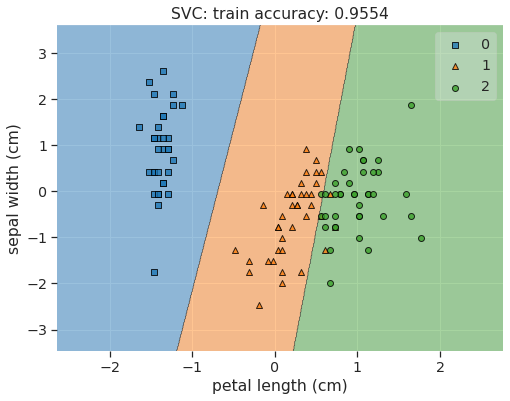

In [31]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (8, 6))
plot_decision_regions(x_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(x_train, y_train):.4f}')
plt.show()


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


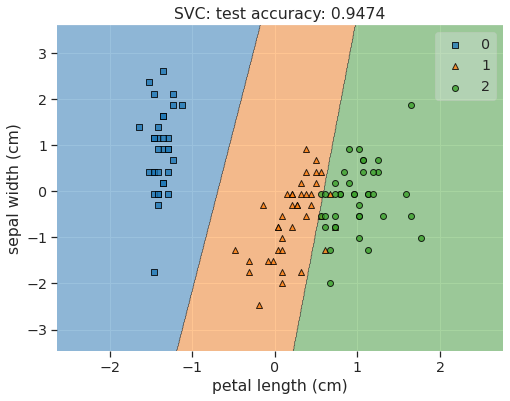

In [32]:
plt.figure(figsize = (8, 6))
plot_decision_regions(x_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(x_test, y_test):.4f}')
plt.show()

In [33]:
classifier = SVC(C = 1, kernel = 'rbf')
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.9736842105263158

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


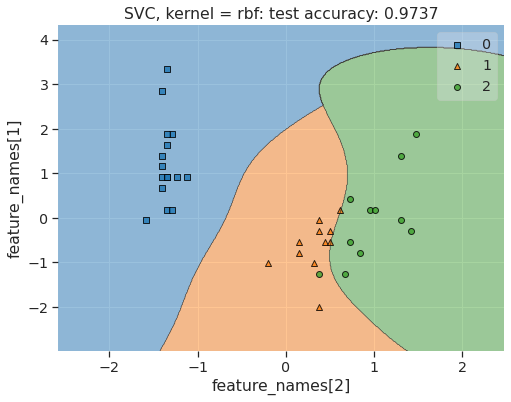

In [34]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_test, y_test, classifier)
plt.xlabel('feature_names[2]')
plt.ylabel('feature_names[1]')
plt.title(f'SVC, kernel = rbf: test accuracy: {classifier.score(x_test, y_test):.4f}')
plt.show()


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


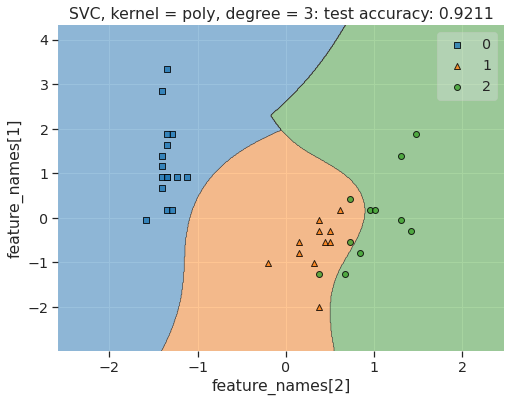

In [35]:
classifier = SVC(C = 1, kernel = 'poly', degree = 3)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

plt.figure(figsize = (8,6))
plot_decision_regions(x_test, y_test, classifier)
plt.xlabel('feature_names[2]')
plt.ylabel('feature_names[1]')
plt.title(f'SVC, kernel = poly, degree = 3: test accuracy: {classifier.score(x_test, y_test):.4f}')
plt.show()